## Impute missing data using Spline interpolation


### `dataframe.interpolate(method='spline', order=k)`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

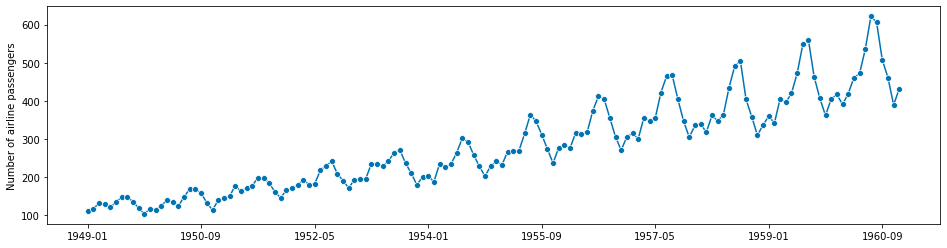

In [2]:
y = load_airline()
plot_series(y);

## Lets create some missing data

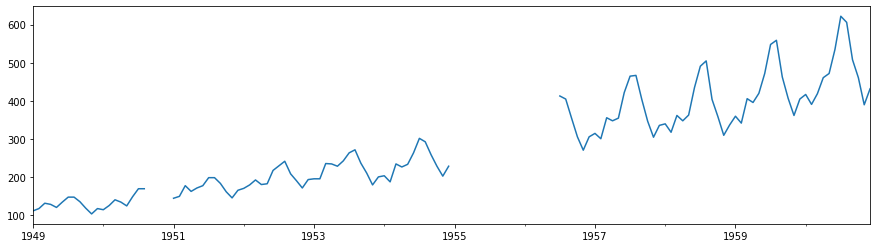

In [12]:
temp = y.copy()
# small-gap of missing data
temp[y.loc['1950-09':'1950-12'].index]=np.nan
# large-gap of missing data
temp[y.loc['1955-01':'1956-06'].index]=np.nan

# Index column must be numeric or datetime type when using spline method
temp.index = temp.index.to_timestamp()
temp.plot(figsize=(15,4));


## Spline Interpolation

#### Index column must be numeric or datetime type when using spline method other than linear. 
Try setting a numeric or datetime index column before interpolating.

### spline order 2

<AxesSubplot:>

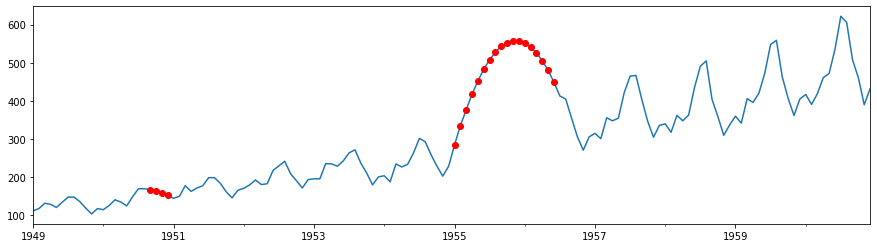

In [14]:
temp_imputed = temp.interpolate(method='spline', order=2)
temp_imputed.plot(figsize=(15,4));
temp_imputed.loc[temp.isnull()].plot(ls='', marker='o', c='r')

### spline order 3

<AxesSubplot:>

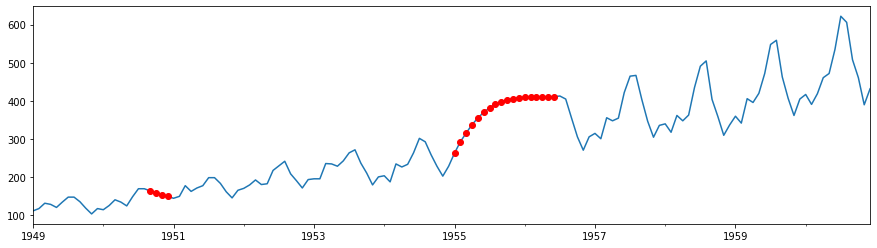

In [13]:
temp_imputed = temp.interpolate(method='spline', order=3)
temp_imputed.plot(figsize=(15,4));
temp_imputed.loc[temp.isnull()].plot(ls='', marker='o', c='r')

## Spline Interpolation fit a curve to impute the missing

### `dataframe.interpolate(method='spline', order=k)`

* #### For short gaps there is minimal distortion to the time series
* #### For larger gaps there is greater distortion to the time series.
* #### Typically we set order = 3


* Typically we set order = 3
* Setting a high value for order actually fit a complex curve between the missing value
* If the gap is large there is more freedom to pick a curve that is complex

## Spline order 5


<AxesSubplot:>

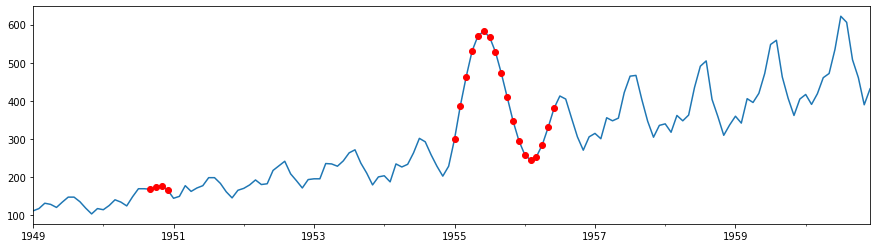

In [16]:
temp_imputed = temp.interpolate(method='spline', order=5)
temp_imputed.plot(figsize=(15,4));
temp_imputed.loc[temp.isnull()].plot(ls='', marker='o', c='r')